In [38]:
import pandas as pd
from pandas import DataFrame,Series
import numpy as np
import os
import datetime

#Plotting
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

# sklearn stuff
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, mean_squared_error, precision_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, Imputer 
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

### Reading in data 

In [39]:
#maindir = "/home/anerdi/Desktop/Zillow"
maindir = "/users/ccheung/Desktop/Zillow"

logerror = pd.read_csv(maindir + "/data/train_2016_v2.csv/train_2016_v2.csv")
logerror['weeknumber'] = logerror['transactiondate'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d').isocalendar()[1])
logerror['month'] = logerror['transactiondate'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d').month)
properties = pd.read_csv(maindir + "/data/properties_2016.csv/properties_2016.csv")
test_parcels = pd.read_csv(maindir + "/data/sample_submission.csv", usecols = ['ParcelId'])

test_parcels.rename(columns={'ParcelId':'parcelid'}, inplace=True)

C:\Users\ccheung\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## ElasticNet

In [40]:
# join on parcel id
data = pd.merge(properties,logerror[['parcelid','logerror','month']], on='parcelid')

ElasticNetError = pd.DataFrame(pd.read_csv("ElasticNet.gz",compression='gzip'))
ElasticNetError.rename(columns={'ParcelId': 'parcelid'}, inplace=True)
ElasticNetErrorT = pd.merge(ElasticNetError[['parcelid', '201610', '201611', '201612']], \
         data[['parcelid','logerror','month','calculatedfinishedsquarefeet', 'latitude', 'bathroomcnt', \
               'structuretaxvaluedollarcnt', 'regionidcounty']], on='parcelid')

In [41]:
c1_ix = np.where(ElasticNetErrorT['regionidcounty'] == 2061)
c2_ix = np.where(ElasticNetErrorT['regionidcounty'] == 3101)
c3_ix = np.where(ElasticNetErrorT['regionidcounty'] == 1286)

Y_c1 = ElasticNetErrorT.iloc[c1_ix]['201610'] - ElasticNetErrorT.iloc[c1_ix]['logerror'] 
Y_c2 = ElasticNetErrorT.iloc[c2_ix]['201610'] - ElasticNetErrorT.iloc[c2_ix]['logerror'] 
Y_c3 = ElasticNetErrorT.iloc[c3_ix]['201610'] - ElasticNetErrorT.iloc[c3_ix]['logerror'] 

M = ElasticNetErrorT['calculatedfinishedsquarefeet'].mean()
X_c1 = ElasticNetErrorT.iloc[c1_ix]['calculatedfinishedsquarefeet'].replace(M, np.NaN)
X_c2 = ElasticNetErrorT.iloc[c2_ix]['calculatedfinishedsquarefeet'].replace(M, np.NaN)
X_c3 = ElasticNetErrorT.iloc[c3_ix]['calculatedfinishedsquarefeet'].replace(M, np.NaN)

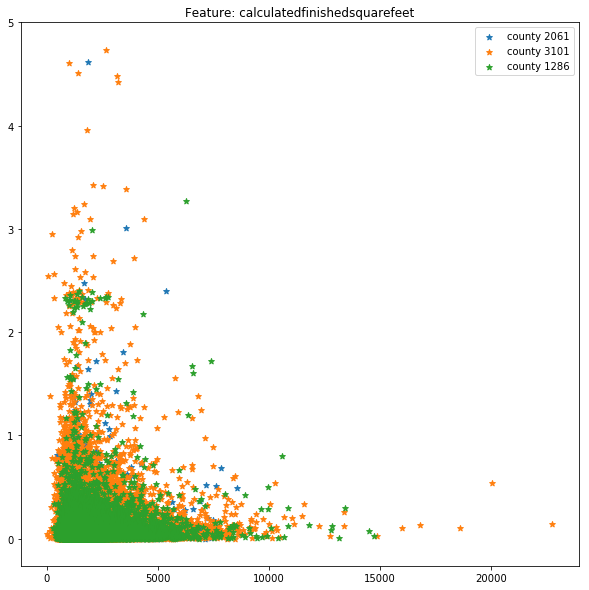

In [42]:
plt.figure(figsize=(10,10))
plt.scatter(X_c1.values, abs(Y_c1.values), marker='*', label='county 2061')
plt.scatter(X_c2.values, abs(Y_c2.values), marker='*', label='county 3101')
plt.scatter(X_c3.values, abs(Y_c3.values), marker='*', label='county 1286')
plt.title("Feature: calculatedfinishedsquarefeet")
plt.legend(loc=1)

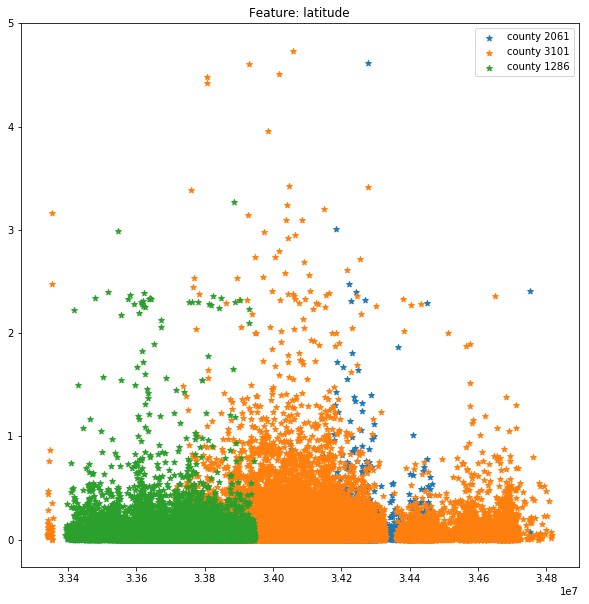

In [43]:
M = ElasticNetErrorT['latitude'].mean()
X_c1 = ElasticNetErrorT.iloc[c1_ix]['latitude'].replace(M, np.NaN)
X_c2 = ElasticNetErrorT.iloc[c2_ix]['latitude'].replace(M, np.NaN)
X_c3 = ElasticNetErrorT.iloc[c3_ix]['latitude'].replace(M, np.NaN)

plt.figure(figsize=(10,10))
plt.scatter(X_c1.values, abs(Y_c1.values), marker='*', label='county 2061')
plt.scatter(X_c2.values, abs(Y_c2.values), marker='*', label='county 3101')
plt.scatter(X_c3.values, abs(Y_c3.values), marker='*', label='county 1286')
plt.title("Feature: latitude")
plt.legend(loc=1)

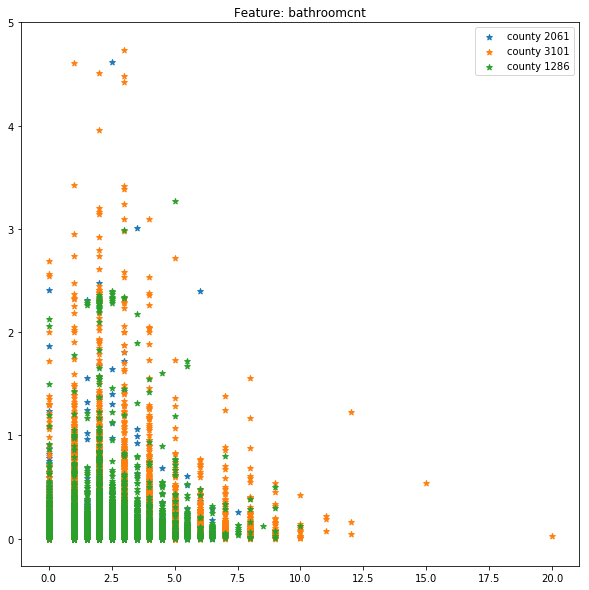

In [44]:
M = ElasticNetErrorT['bathroomcnt'].mean()
X_c1 = ElasticNetErrorT.iloc[c1_ix]['bathroomcnt'].replace(M, np.NaN)
X_c2 = ElasticNetErrorT.iloc[c2_ix]['bathroomcnt'].replace(M, np.NaN)
X_c3 = ElasticNetErrorT.iloc[c3_ix]['bathroomcnt'].replace(M, np.NaN)

plt.figure(figsize=(10,10))
plt.scatter(X_c1.values, abs(Y_c1.values), marker='*', label='county 2061')
plt.scatter(X_c2.values, abs(Y_c2.values), marker='*', label='county 3101')
plt.scatter(X_c3.values, abs(Y_c3.values), marker='*', label='county 1286')
plt.title("Feature: bathroomcnt")
plt.legend(loc=1)

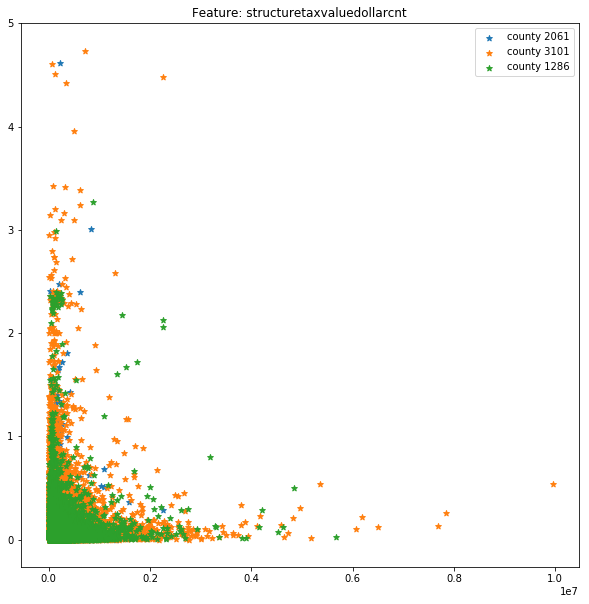

In [45]:
M = ElasticNetErrorT['structuretaxvaluedollarcnt'].mean()
X_c1 = ElasticNetErrorT.iloc[c1_ix]['structuretaxvaluedollarcnt'].replace(M, np.NaN)
X_c2 = ElasticNetErrorT.iloc[c2_ix]['structuretaxvaluedollarcnt'].replace(M, np.NaN)
X_c3 = ElasticNetErrorT.iloc[c3_ix]['structuretaxvaluedollarcnt'].replace(M, np.NaN)

plt.figure(figsize=(10,10))
plt.scatter(X_c1.values, abs(Y_c1.values), marker='*', label='county 2061')
plt.scatter(X_c2.values, abs(Y_c2.values), marker='*', label='county 3101')
plt.scatter(X_c3.values, abs(Y_c3.values), marker='*', label='county 1286')
plt.title("Feature: structuretaxvaluedollarcnt")
plt.legend(loc=1)

## LARM

In [46]:
LARMError = pd.DataFrame(pd.read_csv("LARM.gz",compression='gzip'))
LARMError.rename(columns={'ParcelId': 'parcelid'}, inplace=True)
LARMError = pd.merge(LARMError[['parcelid', '201610', '201611', '201612']], \
         data[['parcelid','logerror','month','calculatedfinishedsquarefeet', 'latitude', 'bathroomcnt', \
               'structuretaxvaluedollarcnt', 'regionidcounty']], on='parcelid')

In [47]:
c1_ix = np.where(LARMError['regionidcounty'] == 2061)
c2_ix = np.where(LARMError['regionidcounty'] == 3101)
c3_ix = np.where(LARMError['regionidcounty'] == 1286)

Y_c1 = LARMError.iloc[c1_ix]['201610'] - LARMError.iloc[c1_ix]['logerror'] 
Y_c2 = LARMError.iloc[c2_ix]['201610'] - LARMError.iloc[c2_ix]['logerror'] 
Y_c3 = LARMError.iloc[c3_ix]['201610'] - LARMError.iloc[c3_ix]['logerror'] 

M = LARMError['calculatedfinishedsquarefeet'].mean()
X_c1 = LARMError.iloc[c1_ix]['calculatedfinishedsquarefeet'].replace(M, np.NaN)
X_c2 = LARMError.iloc[c2_ix]['calculatedfinishedsquarefeet'].replace(M, np.NaN)
X_c3 = LARMError.iloc[c3_ix]['calculatedfinishedsquarefeet'].replace(M, np.NaN)

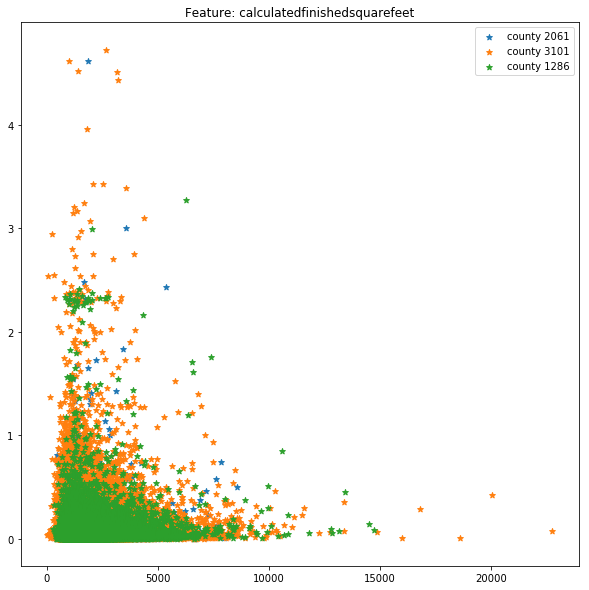

In [48]:
plt.figure(figsize=(10,10))
plt.scatter(X_c1.values, abs(Y_c1.values), marker='*', label='county 2061')
plt.scatter(X_c2.values, abs(Y_c2.values), marker='*', label='county 3101')
plt.scatter(X_c3.values, abs(Y_c3.values), marker='*', label='county 1286')
plt.title("Feature: calculatedfinishedsquarefeet")
plt.legend(loc=1)

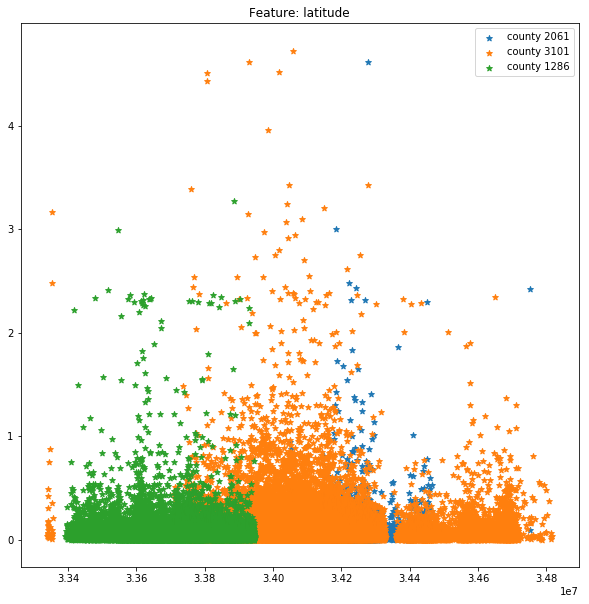

In [49]:
M = LARMError['latitude'].mean()
X_c1 = LARMError.iloc[c1_ix]['latitude'].replace(M, np.NaN)
X_c2 = LARMError.iloc[c2_ix]['latitude'].replace(M, np.NaN)
X_c3 = LARMError.iloc[c3_ix]['latitude'].replace(M, np.NaN)

plt.figure(figsize=(10,10))
plt.scatter(X_c1.values, abs(Y_c1.values), marker='*', label='county 2061')
plt.scatter(X_c2.values, abs(Y_c2.values), marker='*', label='county 3101')
plt.scatter(X_c3.values, abs(Y_c3.values), marker='*', label='county 1286')
plt.title("Feature: latitude")
plt.legend(loc=1)

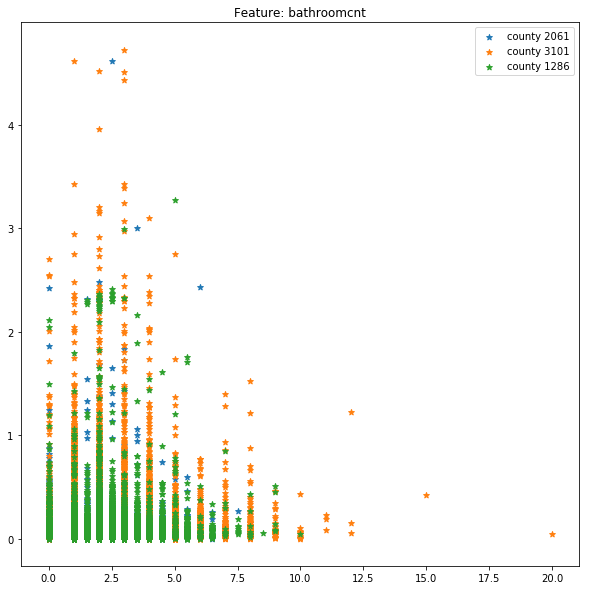

In [50]:
M = LARMError['bathroomcnt'].mean()
X_c1 = LARMError.iloc[c1_ix]['bathroomcnt'].replace(M, np.NaN)
X_c2 = LARMError.iloc[c2_ix]['bathroomcnt'].replace(M, np.NaN)
X_c3 = LARMError.iloc[c3_ix]['bathroomcnt'].replace(M, np.NaN)

plt.figure(figsize=(10,10))
plt.scatter(X_c1.values, abs(Y_c1.values), marker='*', label='county 2061')
plt.scatter(X_c2.values, abs(Y_c2.values), marker='*', label='county 3101')
plt.scatter(X_c3.values, abs(Y_c3.values), marker='*', label='county 1286')
plt.title("Feature: bathroomcnt")
plt.legend(loc=1)

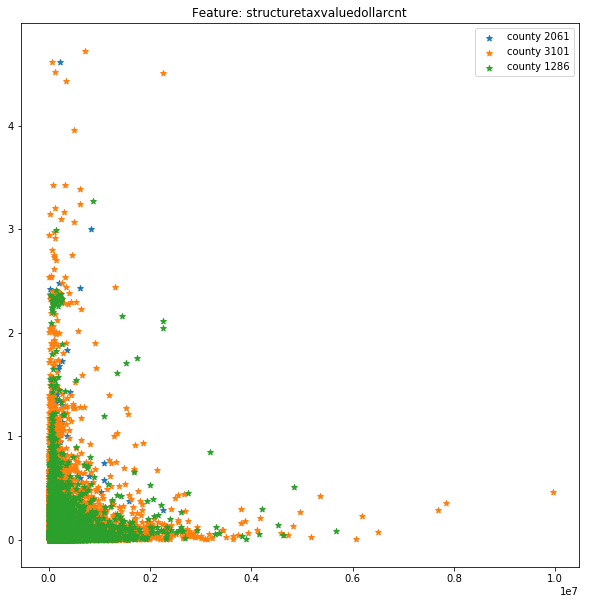

In [51]:
M = LARMError['structuretaxvaluedollarcnt'].mean()
X_c1 = LARMError.iloc[c1_ix]['structuretaxvaluedollarcnt'].replace(M, np.NaN)
X_c2 = LARMError.iloc[c2_ix]['structuretaxvaluedollarcnt'].replace(M, np.NaN)
X_c3 = LARMError.iloc[c3_ix]['structuretaxvaluedollarcnt'].replace(M, np.NaN)

plt.figure(figsize=(10,10))
plt.scatter(X_c1.values, abs(Y_c1.values), marker='*', label='county 2061')
plt.scatter(X_c2.values, abs(Y_c2.values), marker='*', label='county 3101')
plt.scatter(X_c3.values, abs(Y_c3.values), marker='*', label='county 1286')
plt.title("Feature: structuretaxvaluedollarcnt")
plt.legend(loc=1)

## HuberRegressor

In [52]:
HuberRegressorError = pd.DataFrame(pd.read_csv("HuberRegressor.gz",compression='gzip'))
HuberRegressorError.rename(columns={'ParcelId': 'parcelid'}, inplace=True)
HuberRegressorError = pd.merge(HuberRegressorError[['parcelid', '201610', '201611', '201612']], \
         data[['parcelid','logerror','month','calculatedfinishedsquarefeet', 'latitude', 'bathroomcnt', \
               'structuretaxvaluedollarcnt', 'regionidcounty']], on='parcelid')

In [53]:
c1_ix = np.where(HuberRegressorError['regionidcounty'] == 2061)
c2_ix = np.where(HuberRegressorError['regionidcounty'] == 3101)
c3_ix = np.where(HuberRegressorError['regionidcounty'] == 1286)

Y_c1 = HuberRegressorError.iloc[c1_ix]['201610'] - HuberRegressorError.iloc[c1_ix]['logerror'] 
Y_c2 = HuberRegressorError.iloc[c2_ix]['201610'] - HuberRegressorError.iloc[c2_ix]['logerror'] 
Y_c3 = HuberRegressorError.iloc[c3_ix]['201610'] - HuberRegressorError.iloc[c3_ix]['logerror'] 

M = HuberRegressorError['calculatedfinishedsquarefeet'].mean()
X_c1 = HuberRegressorError.iloc[c1_ix]['calculatedfinishedsquarefeet'].replace(M, np.NaN)
X_c2 = HuberRegressorError.iloc[c2_ix]['calculatedfinishedsquarefeet'].replace(M, np.NaN)
X_c3 = HuberRegressorError.iloc[c3_ix]['calculatedfinishedsquarefeet'].replace(M, np.NaN)

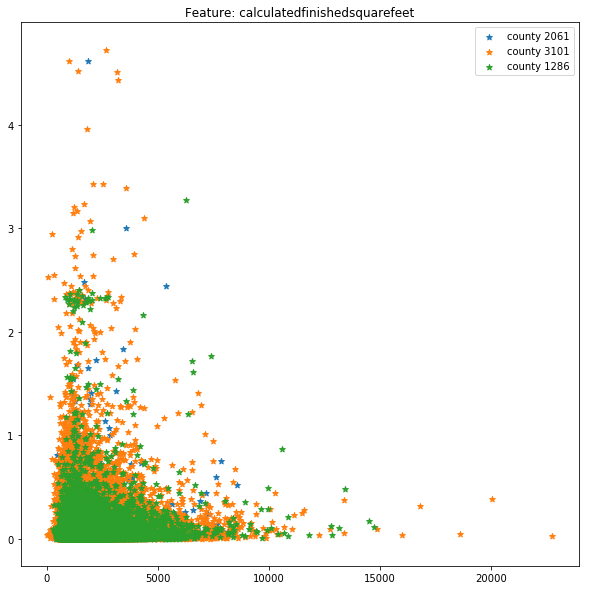

In [54]:
plt.figure(figsize=(10,10))
plt.scatter(X_c1.values, abs(Y_c1.values), marker='*', label='county 2061')
plt.scatter(X_c2.values, abs(Y_c2.values), marker='*', label='county 3101')
plt.scatter(X_c3.values, abs(Y_c3.values), marker='*', label='county 1286')
plt.title("Feature: calculatedfinishedsquarefeet")
plt.legend(loc=1)

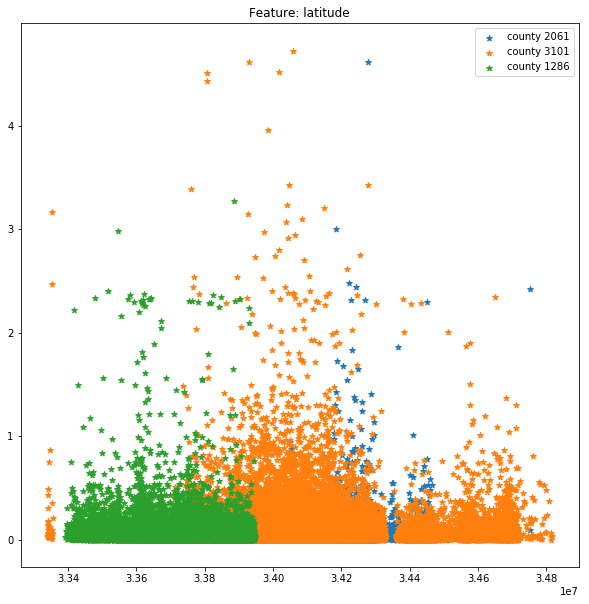

In [55]:
M = HuberRegressorError['latitude'].mean()
X_c1 = HuberRegressorError.iloc[c1_ix]['latitude'].replace(M, np.NaN)
X_c2 = HuberRegressorError.iloc[c2_ix]['latitude'].replace(M, np.NaN)
X_c3 = HuberRegressorError.iloc[c3_ix]['latitude'].replace(M, np.NaN)

plt.figure(figsize=(10,10))
plt.scatter(X_c1.values, abs(Y_c1.values), marker='*', label='county 2061')
plt.scatter(X_c2.values, abs(Y_c2.values), marker='*', label='county 3101')
plt.scatter(X_c3.values, abs(Y_c3.values), marker='*', label='county 1286')
plt.title("Feature: latitude")
plt.legend(loc=1)

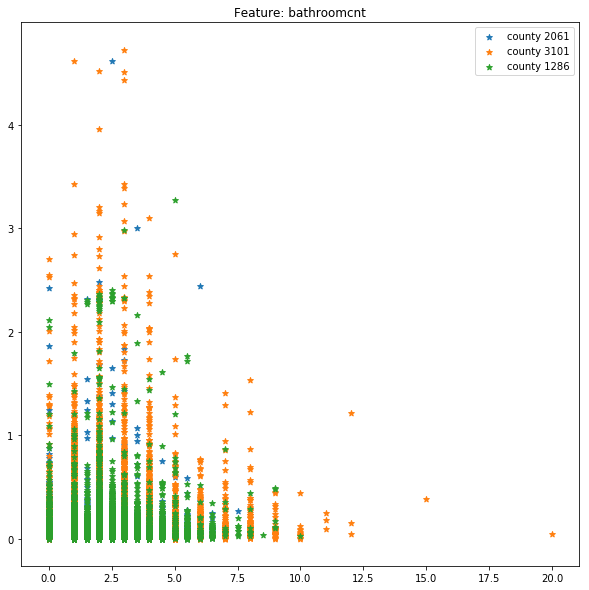

In [56]:
M = HuberRegressorError['bathroomcnt'].mean()
X_c1 = HuberRegressorError.iloc[c1_ix]['bathroomcnt'].replace(M, np.NaN)
X_c2 = HuberRegressorError.iloc[c2_ix]['bathroomcnt'].replace(M, np.NaN)
X_c3 = HuberRegressorError.iloc[c3_ix]['bathroomcnt'].replace(M, np.NaN)

plt.figure(figsize=(10,10))
plt.scatter(X_c1.values, abs(Y_c1.values), marker='*', label='county 2061')
plt.scatter(X_c2.values, abs(Y_c2.values), marker='*', label='county 3101')
plt.scatter(X_c3.values, abs(Y_c3.values), marker='*', label='county 1286')
plt.title("Feature: bathroomcnt")
plt.legend(loc=1)

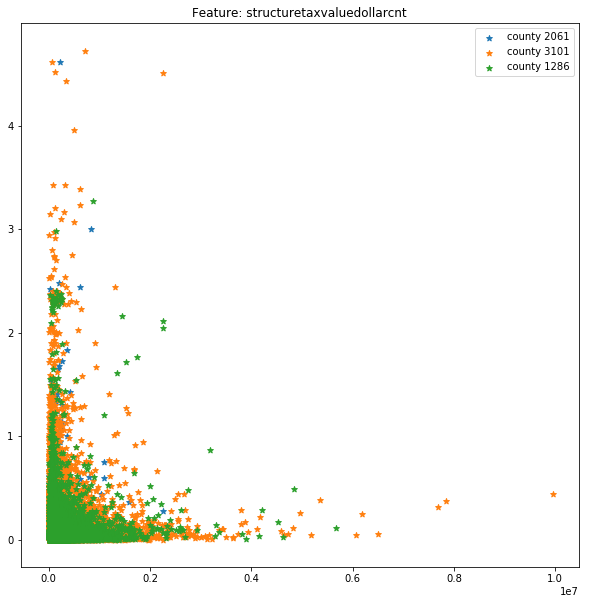

In [57]:
M = HuberRegressorError['structuretaxvaluedollarcnt'].mean()
X_c1 = HuberRegressorError.iloc[c1_ix]['structuretaxvaluedollarcnt'].replace(M, np.NaN)
X_c2 = HuberRegressorError.iloc[c2_ix]['structuretaxvaluedollarcnt'].replace(M, np.NaN)
X_c3 = HuberRegressorError.iloc[c3_ix]['structuretaxvaluedollarcnt'].replace(M, np.NaN)

plt.figure(figsize=(10,10))
plt.scatter(X_c1.values, abs(Y_c1.values), marker='*', label='county 2061')
plt.scatter(X_c2.values, abs(Y_c2.values), marker='*', label='county 3101')
plt.scatter(X_c3.values, abs(Y_c3.values), marker='*', label='county 1286')
plt.title("Feature: structuretaxvaluedollarcnt")
plt.legend(loc=1)

## Linear Mixed Effect Model

In [58]:
LMEError = pd.DataFrame(pd.read_csv("LME.csv.gz",compression='gzip'))
LMEError.rename(columns={'ParcelId': 'parcelid'}, inplace=True)
LMEError = pd.merge(LARMError[['parcelid', '201610', '201611', '201612']], \
         data[['parcelid','logerror','month','calculatedfinishedsquarefeet', 'latitude', 'bathroomcnt', \
               'structuretaxvaluedollarcnt','regionidcounty']], on='parcelid')

In [59]:
c1_ix = np.where(LMEError['regionidcounty'] == 2061)
c2_ix = np.where(LMEError['regionidcounty'] == 3101)
c3_ix = np.where(LMEError['regionidcounty'] == 1286)

Y_c1 = LMEError.iloc[c1_ix]['201610'] - LMEError.iloc[c1_ix]['logerror'] 
Y_c2 = LMEError.iloc[c2_ix]['201610'] - LMEError.iloc[c2_ix]['logerror'] 
Y_c3 = LMEError.iloc[c3_ix]['201610'] - LMEError.iloc[c3_ix]['logerror'] 

M = LMEError['calculatedfinishedsquarefeet'].mean()
X_c1 = LMEError.iloc[c1_ix]['calculatedfinishedsquarefeet'].replace(M, np.NaN)
X_c2 = LMEError.iloc[c2_ix]['calculatedfinishedsquarefeet'].replace(M, np.NaN)
X_c3 = LMEError.iloc[c3_ix]['calculatedfinishedsquarefeet'].replace(M, np.NaN)

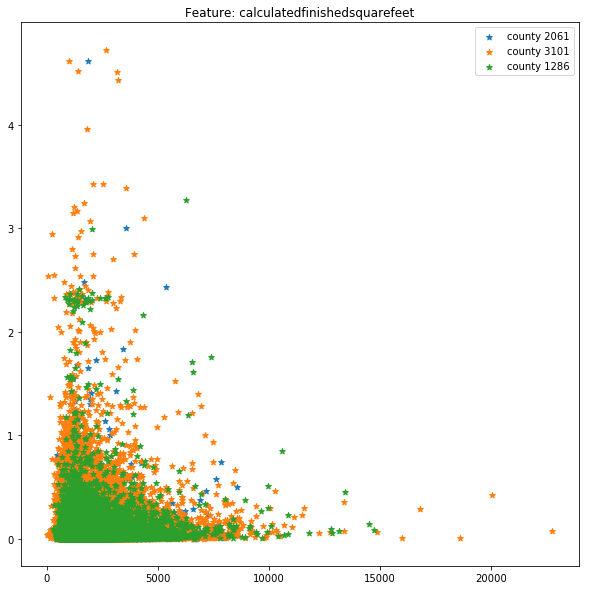

In [60]:
plt.figure(figsize=(10,10))
plt.scatter(X_c1.values, abs(Y_c1.values), marker='*', label='county 2061')
plt.scatter(X_c2.values, abs(Y_c2.values), marker='*', label='county 3101')
plt.scatter(X_c3.values, abs(Y_c3.values), marker='*', label='county 1286')
plt.title("Feature: calculatedfinishedsquarefeet")
plt.legend(loc=1)

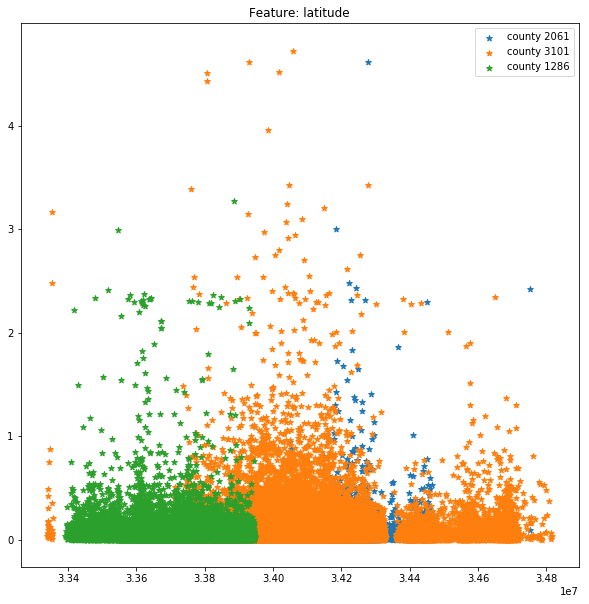

In [61]:
M = LMEError['latitude'].mean()
X_c1 = LMEError.iloc[c1_ix]['latitude'].replace(M, np.NaN)
X_c2 = LMEError.iloc[c2_ix]['latitude'].replace(M, np.NaN)
X_c3 = LMEError.iloc[c3_ix]['latitude'].replace(M, np.NaN)

plt.figure(figsize=(10,10))
plt.scatter(X_c1.values, abs(Y_c1.values), marker='*', label='county 2061')
plt.scatter(X_c2.values, abs(Y_c2.values), marker='*', label='county 3101')
plt.scatter(X_c3.values, abs(Y_c3.values), marker='*', label='county 1286')
plt.title("Feature: latitude")
plt.legend(loc=1)

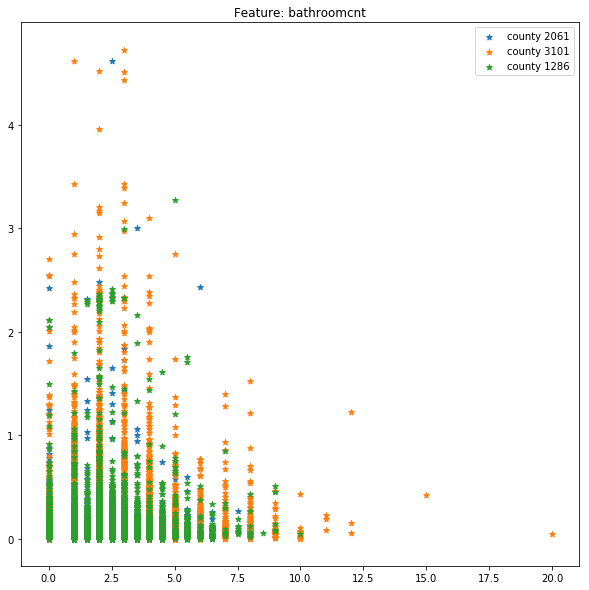

In [62]:
M = LMEError['bathroomcnt'].mean()
X_c1 = LMEError.iloc[c1_ix]['bathroomcnt'].replace(M, np.NaN)
X_c2 = LMEError.iloc[c2_ix]['bathroomcnt'].replace(M, np.NaN)
X_c3 = LMEError.iloc[c3_ix]['bathroomcnt'].replace(M, np.NaN)

plt.figure(figsize=(10,10))
plt.scatter(X_c1.values, abs(Y_c1.values), marker='*', label='county 2061')
plt.scatter(X_c2.values, abs(Y_c2.values), marker='*', label='county 3101')
plt.scatter(X_c3.values, abs(Y_c3.values), marker='*', label='county 1286')
plt.title("Feature: bathroomcnt")
plt.legend(loc=1)

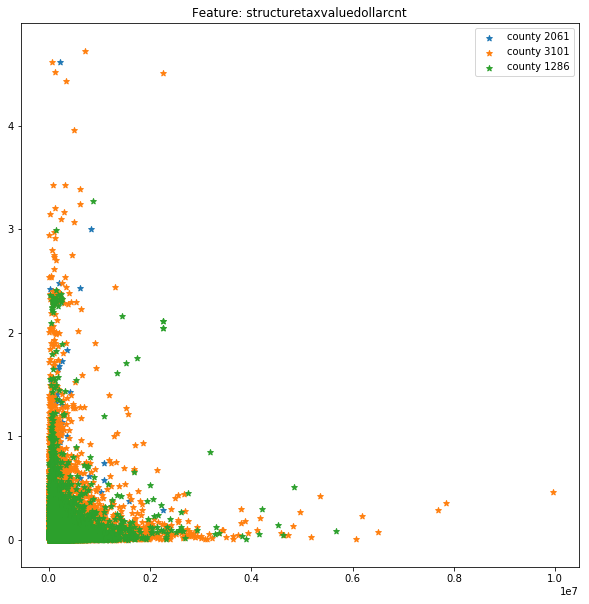

In [63]:
M = LMEError['structuretaxvaluedollarcnt'].mean()
X_c1 = LMEError.iloc[c1_ix]['structuretaxvaluedollarcnt'].replace(M, np.NaN)
X_c2 = LMEError.iloc[c2_ix]['structuretaxvaluedollarcnt'].replace(M, np.NaN)
X_c3 = LMEError.iloc[c3_ix]['structuretaxvaluedollarcnt'].replace(M, np.NaN)

plt.figure(figsize=(10,10))
plt.scatter(X_c1.values, abs(Y_c1.values), marker='*', label='county 2061')
plt.scatter(X_c2.values, abs(Y_c2.values), marker='*', label='county 3101')
plt.scatter(X_c3.values, abs(Y_c3.values), marker='*', label='county 1286')
plt.title("Feature: structuretaxvaluedollarcnt")
plt.legend(loc=1)